<a href="https://colab.research.google.com/github/nnoor20/Image-Processing-FInal-Project/blob/main/FinalImageProcessing_Noora_and_Christina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Processing Final Project

---


1.  Face detection
2.  License Plate detection
3. lane detection







# by: Noora Noor and Christina Chum

In [ ]:
from google.colab import drive
drive.mount('/content/ImageClass')

Mounted at /content/ImageClass


License Plate detected through ROI and masking

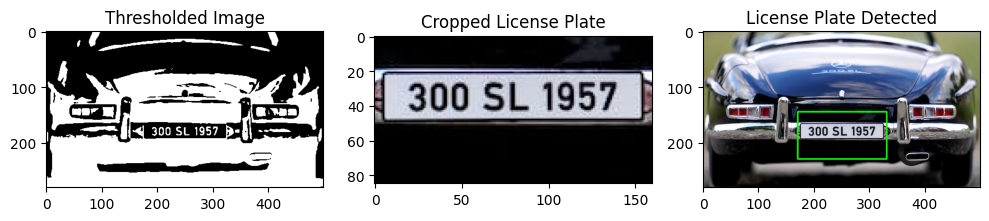

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/ImageClass/MyDrive/licensePlate.jpeg'  # Replace with your image path
image = cv2.imread(image_path)
original_image = image.copy()  # Make a copy for highlighting the detected area

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve accuracy
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to create a binary image
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the thresholded image
thresh = cv2.bitwise_not(thresh)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

license_plate_contour = None

for contour in contours:
    # Get the bounding rectangle for each contour
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)

    # Set conditions to filter out unwanted contours based on aspect ratio and area
    if 2.5 > aspect_ratio > 1.5 and cv2.contourArea(contour) > 1000:
        license_plate_contour = contour
        break

# Create a mask for the detected license plate
mask = np.zeros(gray.shape, np.uint8)
cv2.drawContours(mask, [license_plate_contour], -1, (255, 255, 255), -1)
result = cv2.bitwise_and(image, image, mask=mask)

# Get the bounding rectangle of the detected license plate contour
x, y, w, h = cv2.boundingRect(license_plate_contour)

# Define the start x and y coordinates for the region of interest (ROI)
start_x, start_y = 170, 145  # You can adjust these values or set them explicitly

# Calculate the end x and y coordinates for the region of interest (ROI)
end_x, end_y = 330, 230  # You can adjust these values or set them explicitly

# Crop the region of interest (ROI) from the original image
cropped_license_plate = image[start_y:end_y, start_x:end_x]

# Display the thresholded image and the cropped license plate region
plt.figure(figsize=(10, 5))

# Display the thresholded image
plt.subplot(1, 3, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')

# Display the cropped license plate region
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cropped_license_plate, cv2.COLOR_BGR2RGB))
plt.title('Cropped License Plate')

# Highlight the detected license plate area in the original image
cv2.rectangle(original_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)  # Add green rectangle

# Display the original image with the detected license plate area highlighted
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('License Plate Detected')

plt.tight_layout()
plt.show()


This code script utilizes the Probabilistic Hough Line Transform from OpenCV to perform lane detection on a grayscale image. It begins by applying Canny edge detection to highlight potential lane lines. The Hough Line Transform then identifies lines corresponding to lanes in the image. Filtered lines, recognized as lane-like based on their orientation, are drawn in red over the original image for visualization using Matplotlib. This process enables the identification and visualization of probable lane markings in the given road image, assisting in lane detection for various computer vision applications.

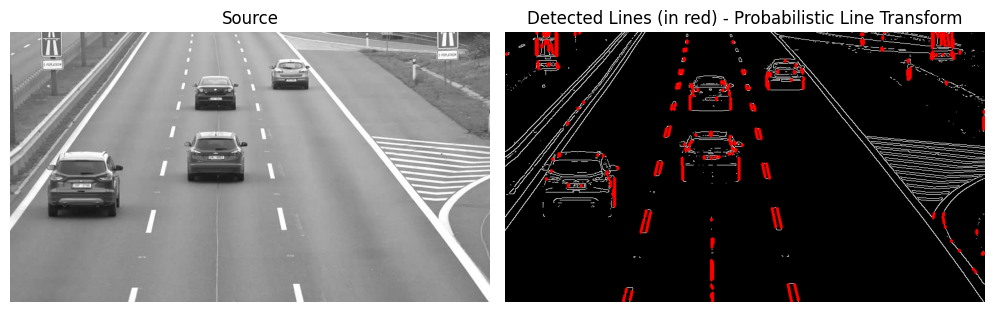

In [ ]:
# Blair Ednie
# HoughLinesP demo for Noora and Christina

import matplotlib.pyplot as plt
import cv2
import numpy as np

# load image
src = cv2.imread("/content/ImageClass/MyDrive/laneAndCar.jpg", cv2.IMREAD_GRAYSCALE)

# hough lines, from (https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html)

# Edge detection
dst = cv2.Canny(src, 200, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)


# Probabilistic Line Transform
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 1, 5, None)


# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        if (l[0] < l[2]):
            pass
        elif (l[1]-2 > l[3]):
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)


# Convert BGR images to RGB for displaying using matplotlib
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
cdst_rgb = cv2.cvtColor(cdst, cv2.COLOR_BGR2RGB)
cdstP_rgb = cv2.cvtColor(cdstP, cv2.COLOR_BGR2RGB)


# Display the images
plt.figure(figsize=(15, 5))


# Display Source Image
plt.subplot(1, 3, 1)
plt.imshow(src_rgb)
plt.title("Source")
plt.axis("off")  # Hide axis


# Display Detected Lines - Probabilistic Line Transform
plt.subplot(1, 3, 2)
plt.imshow(cdstP_rgb)
plt.title("Detected Lines (in red) - Probabilistic Line Transform")
plt.axis("off")  # Hide axis
plt.tight_layout()
plt.show()

This Python code employs OpenCV and Matplotlib libraries to identify and extract regions of interest, namely a face and a license plate, from an image. It begins by loading the image and then defines specific coordinates to precisely locate the regions. Using these coordinates, the code crops out the designated face and license plate sections from the original image. Subsequently, it displays the original image alongside the highlighted face and license plate regions through Matplotlib subplots, offering a visual representation of the identified regions within the image.

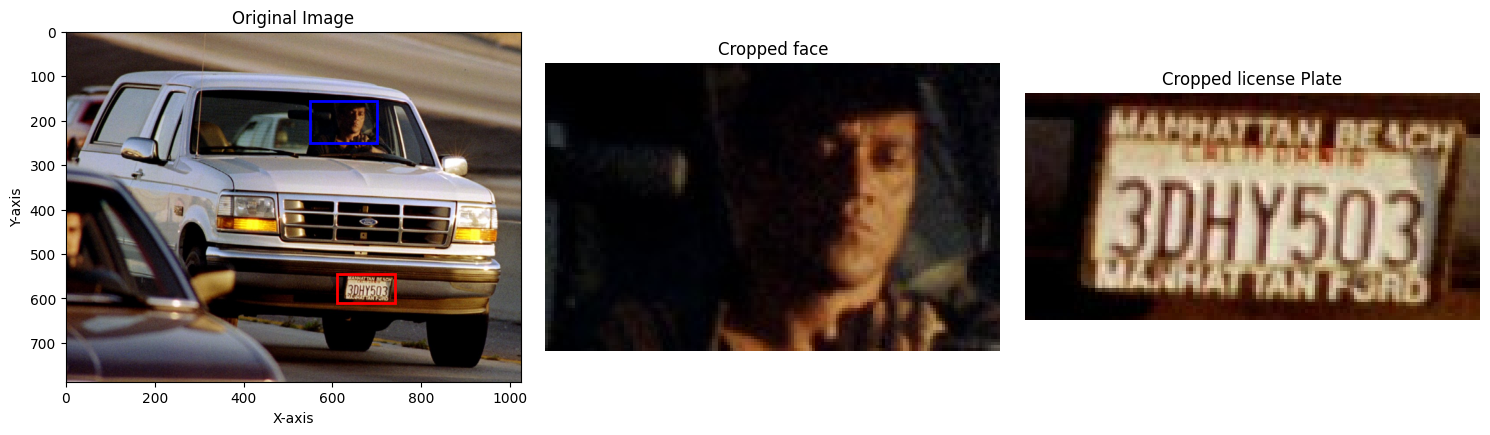

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
image_path = '/content/ImageClass/MyDrive/ojFace.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Define the start x and y coordinates for the face region
face_start_x, face_start_y = 550, 155  # You can adjust these values or set them explicitly

# Calculate the end x and y coordinates for the face region
face_end_x, face_end_y = 700, 250  # You can adjust these values or set them explicitly

# Crop the face region from the original image
cropped_face = image[face_start_y:face_end_y, face_start_x:face_end_x]

# Define the start x and y coordinates for the license plate region
plate_start_x, plate_start_y = 610, 545  # You can adjust these values or set them explicitly

# Calculate the end x and y coordinates for the license plate region
plate_end_x, plate_end_y = 740, 610  # You can adjust these values or set them explicitly

# Crop the license plate region from the original image
cropped_license_plate = image[plate_start_y:plate_end_y, plate_start_x:plate_end_x]

# Display the images in a grid
plt.figure(figsize=(15, 5))

# Original Image with Face and License Plate Regions Highlighted
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Create a rectangle patch (blue box) to highlight the face region
face_rect = patches.Rectangle((face_start_x, face_start_y), face_end_x - face_start_x, face_end_y - face_start_y, linewidth=2, edgecolor='blue', facecolor='none')
plt.gca().add_patch(face_rect)

# Create a rectangle patch (red box) to highlight the license plate region
plate_rect = patches.Rectangle((plate_start_x, plate_start_y), plate_end_x - plate_start_x, plate_end_y - plate_start_y, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(plate_rect)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Cropped Face
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
plt.title('Cropped face')
plt.axis('off')  # Hide axes for cropped image

# Cropped License Plate
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cropped_license_plate, cv2.COLOR_BGR2RGB))
plt.title('Cropped license Plate')
plt.axis('off')  # Hide axes for cropped image

plt.tight_layout()
plt.show()


This Python code employs OpenCV for noise reduction and blurring in an original image, followed by face detection utilizing the Haar Cascade Classifier. Detected faces are delineated with blue rectangles. The code then enhances the image further using PIL by adjusting its contrast and brightness, resulting in an improved image with highlighted face detection.

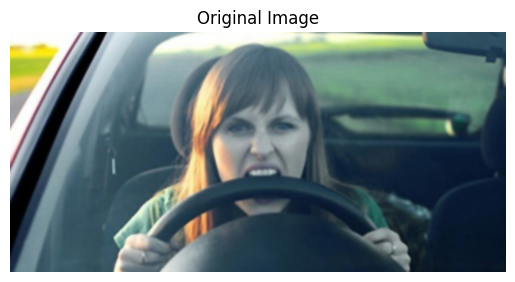

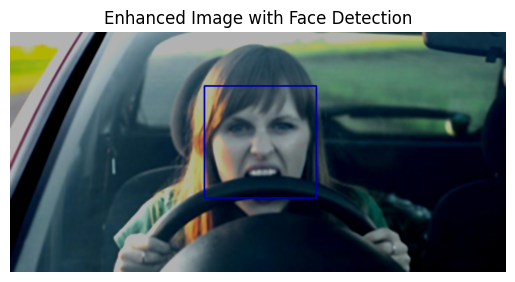

In [ ]:
import cv2
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

# Load the original image using cv2
original_image = cv2.imread("/content/ImageClass/MyDrive/angrylady.jpg")

# Remove noise using bilateral filtering
noise_reduced = cv2.bilateralFilter(original_image, 9, 75, 75)

# Remove blur by applying deconvolution using the unsharp mask filter
deblurred_image = cv2.GaussianBlur(noise_reduced, (5, 5), 0)

# Convert BGR to RGB for displaying with plt.imshow
deblurred_image_rgb = cv2.cvtColor(deblurred_image, cv2.COLOR_BGR2RGB)

# Display the modified image after noise reduction and deblurring
plt.imshow(deblurred_image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Face detection using Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_image = cv2.cvtColor(deblurred_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around detected faces (blue color)
enhanced_image = np.array(deblurred_image.copy())  # Make a copy for drawing purposes
for (x, y, w, h) in faces:
    cv2.rectangle(enhanced_image, (x, y), (x + w, y + h), (255, 0, 0), 3)

# Convert the enhanced image to PIL for contrast and brightness adjustments
enhanced_pil = Image.fromarray(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
enhancer = ImageEnhance.Contrast(enhanced_pil)
enhanced_image = enhancer.enhance(1.5)  # Adjust the contrast factor as needed

# Lower the brightness of the enhanced image
brightness_enhancer = ImageEnhance.Brightness(enhanced_image)
darkened_image = brightness_enhancer.enhance(0.7)  # Adjust the brightness factor

# Display the enhanced and darkened image with face detection
plt.imshow(darkened_image)
plt.axis('off')
plt.title('Enhanced Image with Face Detection')
plt.show()



This code snippet uses OpenCV and Matplotlib to process an image containing multiple license plates. It begins by loading an image and verifying its successful loading. Upon successful loading, it defines coordinates for four distinct license plate regions within the image. It then iterates through each defined region, crops the respective area from the original image, and displays each cropped license plate region using Matplotlib. Additionally, it highlights the detected license plate areas in the original image by drawing green rectangles around each region and presents the resulting image showing the highlighted license plate areas for visualization.

Image loaded successfully!


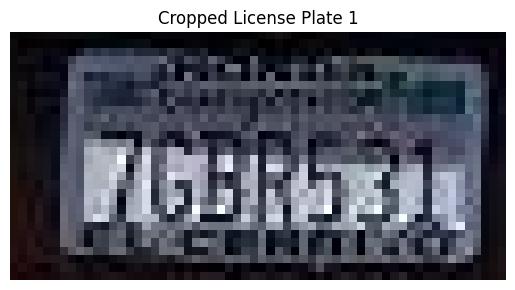

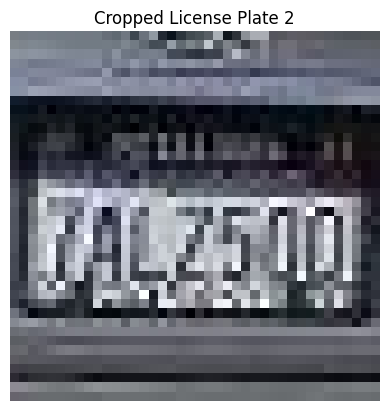

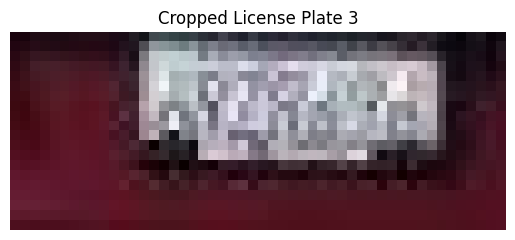

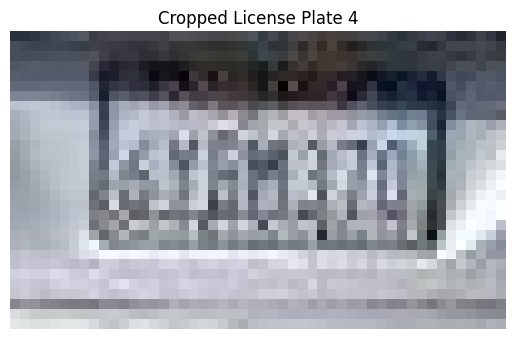

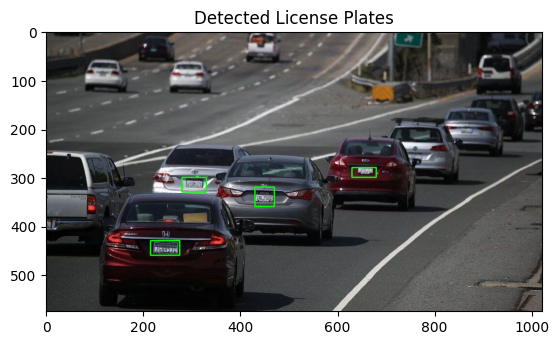

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/ImageClass/MyDrive/license 3.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Could not read the image. Please check the image path.")
else:
    print("Image loaded successfully!")

    # Define coordinates for each license plate [start_x, start_y, end_x, end_y]
    plate_coordinates = [
        [215, 430, 275, 460],   # License plate 1
        [430, 320, 470, 360],   # License plate 2
        [630, 280, 680, 300],  # License plate 3
        [280, 300, 330, 330]   # License plate 4
    ]

    cropped_images = []  # To store cropped license plate images

    # Loop through plate coordinates
    for idx, (start_x, start_y, end_x, end_y) in enumerate(plate_coordinates, start=1):
        # Crop the region of interest (ROI) from the original image
        cropped_license_plate = image[start_y:end_y, start_x:end_x]

        # Display the cropped license plate region
        plt.imshow(cv2.cvtColor(cropped_license_plate, cv2.COLOR_BGR2RGB))
        plt.title(f'Cropped License Plate {idx}')
        plt.axis('off')
        plt.show()

        # Store cropped license plate images
        cropped_images.append(cropped_license_plate)

    # Highlight all four regions in the original image
    highlight_image = image.copy()

    for start_x, start_y, end_x, end_y in plate_coordinates:
        # Draw a green rectangle around each detected license plate region in the original image
        cv2.rectangle(highlight_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

    # Display the original image with highlighted license plate areas
    plt.imshow(cv2.cvtColor(highlight_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected License Plates')
    plt.axis('on')
    plt.show()


this version uses thrusholding to see if it displays the license plate numbers better in this bad image

Image loaded successfully!


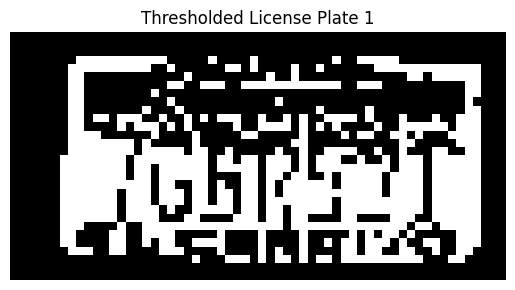

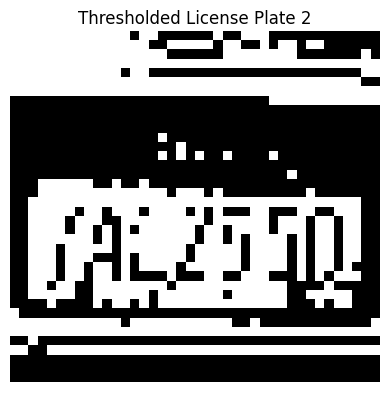

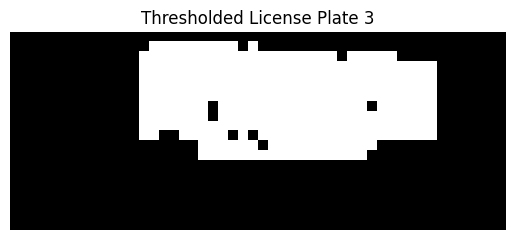

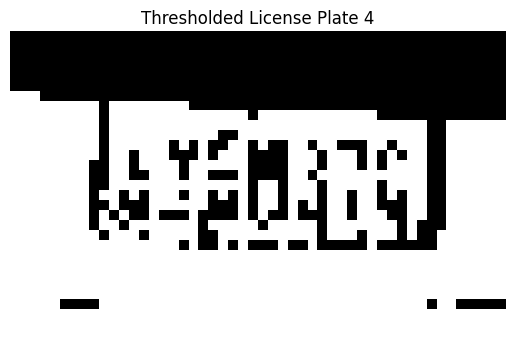

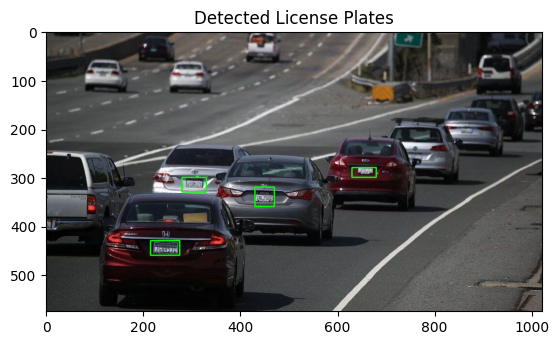

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/ImageClass/MyDrive/license 3.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Could not read the image. Please check the image path.")
else:
    print("Image loaded successfully!")

    # Define coordinates for each license plate [start_x, start_y, end_x, end_y]
    plate_coordinates = [
        [215, 430, 275, 460],   # License plate 1
        [430, 320, 470, 360],   # License plate 2
        [630, 280, 680, 300],   # License plate 3
        [280, 300, 330, 330]    # License plate 4
    ]

    cropped_images = []  # To store cropped license plate images

    # Loop through plate coordinates
    for idx, (start_x, start_y, end_x, end_y) in enumerate(plate_coordinates, start=1):
        # Crop the region of interest (ROI) from the original image
        cropped_license_plate = image[start_y:end_y, start_x:end_x]

        # Convert the cropped image to grayscale
        gray = cv2.cvtColor(cropped_license_plate, cv2.COLOR_BGR2GRAY)

        # Apply thresholding to the cropped image
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Display the thresholded image of the license plate region
        plt.imshow(thresh, cmap='gray')
        plt.title(f'Thresholded License Plate {idx}')
        plt.axis('off')
        plt.show()

        # Store cropped license plate images
        cropped_images.append(thresh)

    # Highlight all four regions in the original image
    highlight_image = image.copy()

    for start_x, start_y, end_x, end_y in plate_coordinates:
        # Draw a green rectangle around each detected license plate region in the original image
        cv2.rectangle(highlight_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

    # Display the original image with highlighted license plate areas
    plt.imshow(cv2.cvtColor(highlight_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected License Plates')
    plt.axis('on')
    plt.show()



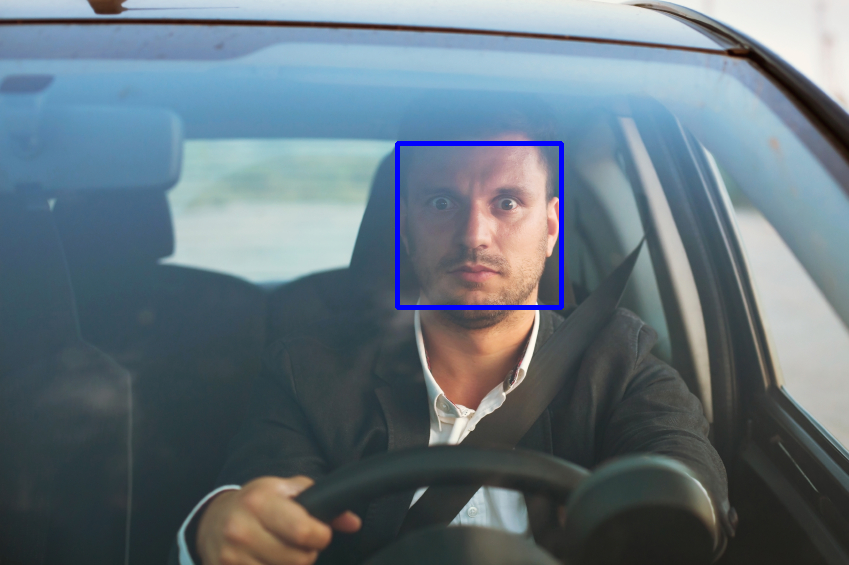

In [ ]:
# Install necessary libraries
!pip install opencv-python
!pip install opencv-python-headless

# Import libraries
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained Haarcascades face classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image from the web (replace with your image URL)
image_url = "https://example.com/your_image.jpg"
img = cv2.imread("/content/ImageClass/MyDrive/MicrosoftTeams-image (52).png")

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)

# Display the result
cv2_imshow(img)



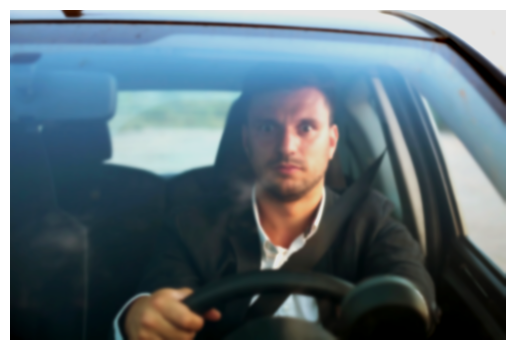

In [ ]:
import cv2
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

# Load the image using cv2
image = cv2.imread("/content/ImageClass/MyDrive/MicrosoftTeams-image (52).png")

# Remove noise using bilateral filtering
noise_reduced = cv2.bilateralFilter(image, 7, 77, 77)

# Remove blur by applying deconvolution using the unsharp mask filter
deblurred_image = cv2.GaussianBlur(noise_reduced, (17, 17), 2)

# Convert BGR to RGB for displaying with plt.imshow
deblurred_image_rgb = cv2.cvtColor(deblurred_image, cv2.COLOR_BGR2RGB)

# Display the modified image after noise reduction and deblurring
# plt.imshow(deblurred_image_rgb)
# plt.axis('off')
# plt.show()

# Enhance contrast using PIL
image_pil = Image.fromarray(cv2.cvtColor(deblurred_image, cv2.COLOR_BGR2RGB))
enhancer = ImageEnhance.Contrast(image_pil)
enhanced_image = enhancer.enhance(1.4)  # Adjust the contrast factor as needed

# Lower the brightness of the enhanced image
brightness_enhancer = ImageEnhance.Brightness(enhanced_image)
darkened_image = brightness_enhancer.enhance(0.9)  # Adjust the brightness factor

# Display the enhanced and darkened image
plt.imshow(darkened_image)
plt.axis('off')
plt.show()

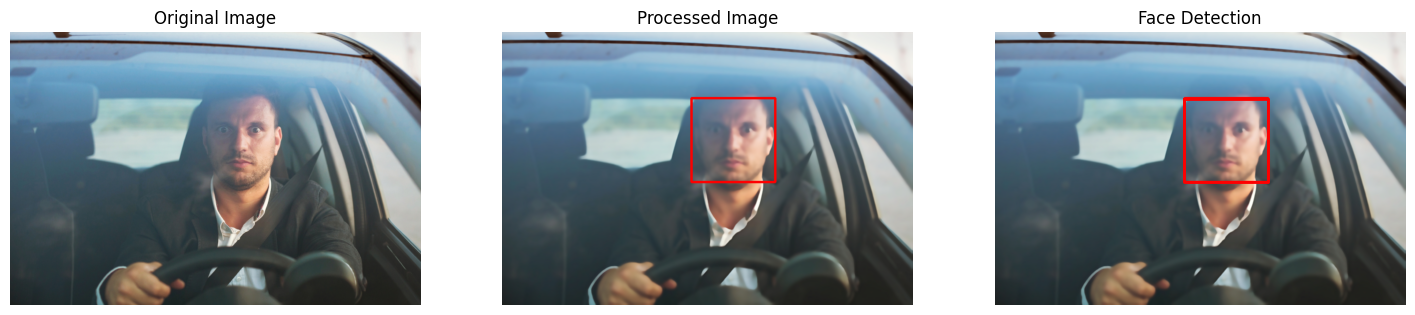

In [ ]:
import cv2
from google.colab import files
from matplotlib import pyplot as plt



# Read the uploaded image
img = cv2.imread("/content/ImageClass/MyDrive/MicrosoftTeams-image (52).png")

# Convert the image to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply median filter
median_img = cv2.medianBlur(img_rgb, 5)

# Apply Gaussian blur
gaussian_img = cv2.GaussianBlur(median_img, (5, 5), 0)

# Apply smoothing
smooth_img = cv2.bilateralFilter(gaussian_img, 9, 75, 75)

# Unsharp masking (sharpening)
blurred_img = cv2.GaussianBlur(smooth_img, (0, 0), 3)
unsharp_img = cv2.addWeighted(smooth_img, 1.5, blurred_img, -0.5, 0)

# Load the pre-trained Haarcascades face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
gray_img = cv2.cvtColor(unsharp_img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(unsharp_img, (x, y), (x+w, y+h), (255, 0, 0), 4)

# Display the original, processed, and face-detected images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Processed Image')
plt.imshow(unsharp_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Face Detection')
plt.imshow(unsharp_img)
for (x, y, w, h) in faces:
    plt.plot([x, x+w, x+w, x, x], [y, y, y+h, y+h, y], color='red', linewidth=2)
plt.axis('off')

plt.show()


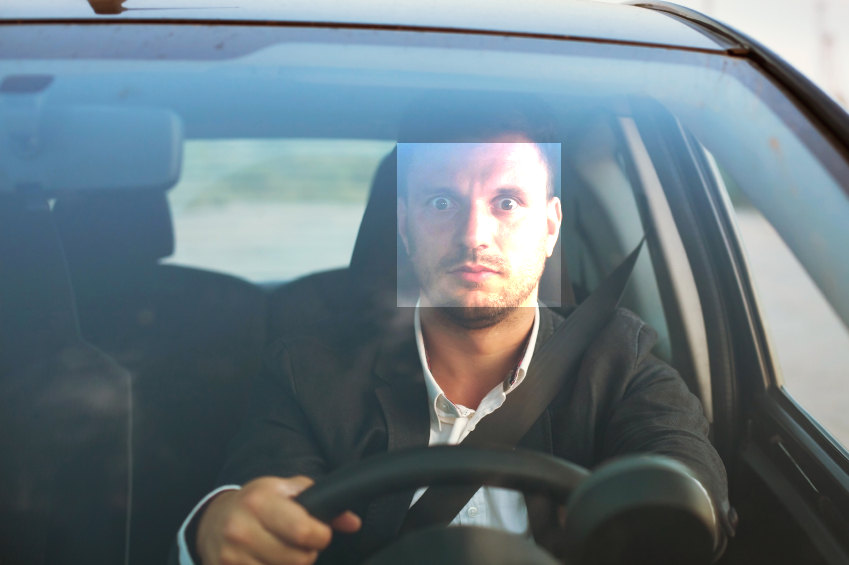

In [ ]:
# Install necessary libraries
!pip install opencv-python
!pip install opencv-python-headless
!pip install Pillow

# Import libraries
import cv2
from PIL import Image, ImageEnhance
from google.colab.patches import cv2_imshow

# Load the pre-trained Haarcascades face classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image from the web (replace with your image URL)
image_url = "/content/ImageClass/MyDrive/MicrosoftTeams-image (52).png"
img = cv2.imread(image_url)

# Convert the image to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    face_roi = img[y:y+h, x:x+w]  # Extract the detected face region

    # Enhance the detected face (you can adjust enhancement factors)
    face_pil = Image.fromarray(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Brightness(face_pil)
    enhanced_face = enhancer.enhance(1.5)  # Example: Increase brightness by 50%

    # Replace the enhanced face back into the original image
    img[y:y+h, x:x+w] = cv2.cvtColor(np.array(enhanced_face), cv2.COLOR_RGB2BGR)

# Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 151ms/step


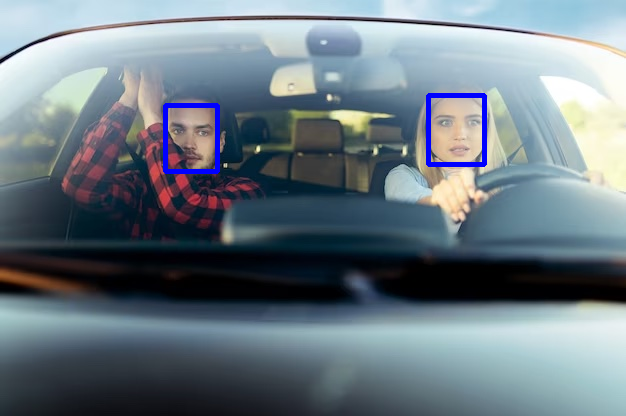

In [ ]:
# Install required libraries
!pip install mtcnn opencv-python Pillow

# Import libraries
import cv2
from PIL import Image
from mtcnn import MTCNN
from IPython.display import display

# Load the image from Google Drive
# Make sure to upload the image to your Google Drive and provide the correct path
image_path = "/content/ImageClass/MyDrive/MicrosoftTeams-image (55).png"
image = cv2.imread(image_path)

# Create an MTCNN detector
detector = MTCNN()

# Perform face detection
faces = detector.detect_faces(image)

# Draw rectangles around the detected faces
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected faces
display(Image.fromarray(image_rgb))



1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 247ms/step


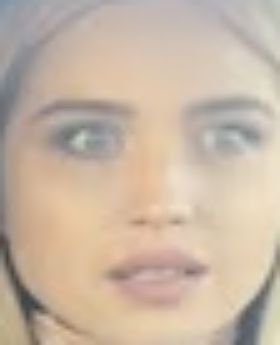

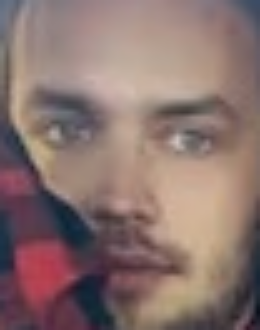

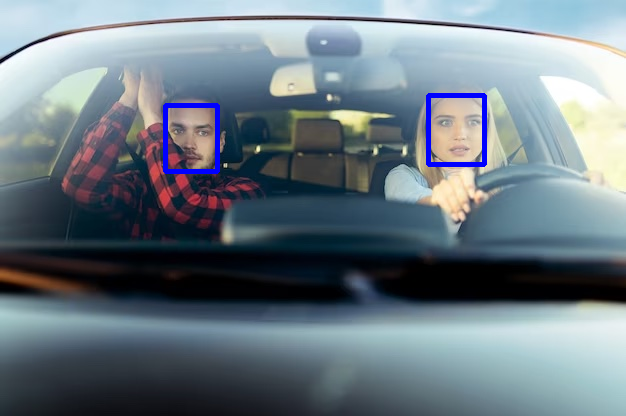

In [ ]:
# Install required libraries
!pip install mtcnn opencv-python Pillow

# Import libraries
import cv2
from PIL import Image
from mtcnn import MTCNN
from IPython.display import display

# Load the image from Google Drive
# Make sure to upload the image to your Google Drive and provide the correct path
image_path = "/content/ImageClass/MyDrive/MicrosoftTeams-image (55).png"
image = cv2.imread(image_path)

# Create an MTCNN detector
detector = MTCNN()

# Perform face detection
faces = detector.detect_faces(image)

# Zoom in on the detected faces
for idx, face in enumerate(faces):
    x, y, w, h = face['box']

    # Extract the region of interest (ROI) around each face
    roi = image[y:y+h, x:x+w]

    # Resize the ROI to make it larger (adjust the scale factor as needed)
    scale_factor = 5.0
    resized_roi = cv2.resize(roi, (int(w * scale_factor), int(h * scale_factor)))

    # Display the zoomed-in face
    display(Image.fromarray(cv2.cvtColor(resized_roi, cv2.COLOR_BGR2RGB)))

    # Save the zoomed-in face (optional)
    cv2.imwrite(f"zoomed_face_{idx+1}.jpg", resized_roi)

# Draw rectangles around the detected faces on the original image
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)

# Convert the original image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image with rectangles around the detected faces
display(Image.fromarray(image_rgb))



1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 153ms/step


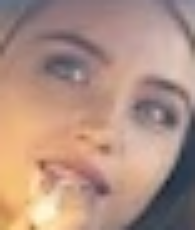

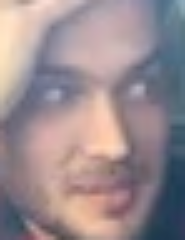

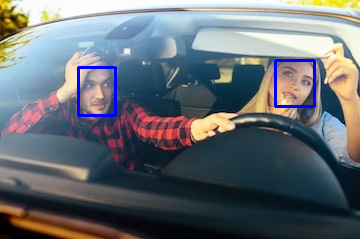

In [ ]:
# Install required libraries
!pip install mtcnn opencv-python Pillow

# Import libraries
import cv2
from PIL import Image
from mtcnn import MTCNN
from IPython.display import display

# Load the image from Google Drive
# Make sure to upload the image to your Google Drive and provide the correct path
image_path = "/content/ImageClass/MyDrive/MicrosoftTeams-image (54).png"
image = cv2.imread(image_path)

# Create an MTCNN detector
detector = MTCNN()

# Perform face detection
faces = detector.detect_faces(image)

# Zoom in on the detected faces
for idx, face in enumerate(faces):
    x, y, w, h = face['box']

    # Extract the region of interest (ROI) around each face
    roi = image[y:y+h, x:x+w]

    # Resize the ROI to make it larger (adjust the scale factor as needed)
    scale_factor = 5.0
    resized_roi = cv2.resize(roi, (int(w * scale_factor), int(h * scale_factor)))

    # Display the zoomed-in face
    display(Image.fromarray(cv2.cvtColor(resized_roi, cv2.COLOR_BGR2RGB)))

    # Save the zoomed-in face (optional)
    cv2.imwrite(f"zoomed_face_{idx+1}.jpg", resized_roi)

# Draw rectangles around the detected faces on the original image
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert the original image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image with rectangles around the detected faces
display(Image.fromarray(image_rgb))


1/1 [==============================] - 0s 242ms/step


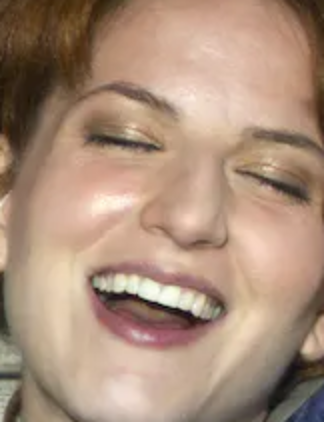

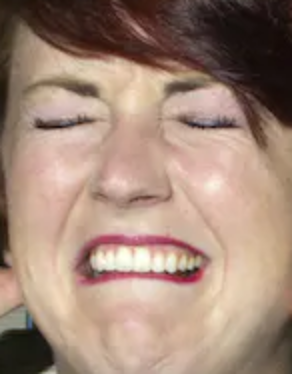

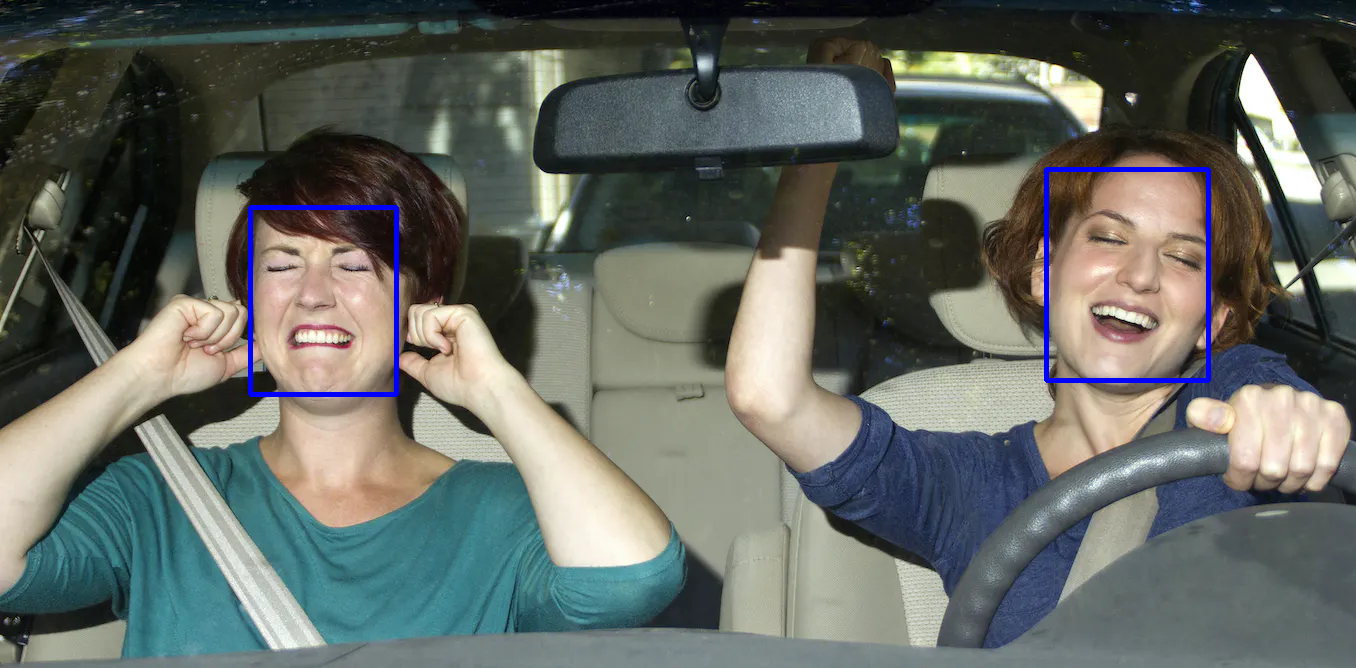

In [ ]:
# Install required libraries
!pip install mtcnn opencv-python Pillow

# Import libraries
import cv2
from PIL import Image
from mtcnn import MTCNN
from IPython.display import display

# Load the image from Google Drive
# Make sure to upload the image to your Google Drive and provide the correct path
image_path = "/content/ImageClass/MyDrive/singingladies.jpg.webp"
image = cv2.imread(image_path)

# Create an MTCNN detector
detector = MTCNN()

# Perform face detection
faces = detector.detect_faces(image)

# Zoom in on the detected faces
for idx, face in enumerate(faces):
    x, y, w, h = face['box']

    # Extract the region of interest (ROI) around each face
    roi = image[y:y+h, x:x+w]

    # Resize the ROI to make it larger (adjust the scale factor as needed)
    scale_factor = 2.0
    resized_roi = cv2.resize(roi, (int(w * scale_factor), int(h * scale_factor)))

    # Display the zoomed-in face
    display(Image.fromarray(cv2.cvtColor(resized_roi, cv2.COLOR_BGR2RGB)))

    # Save the zoomed-in face (optional)
    cv2.imwrite(f"zoomed_face_{idx+1}.jpg", resized_roi)

# Draw rectangles around the detected faces on the original image
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)

# Convert the original image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image with rectangles around the detected faces
display(Image.fromarray(image_rgb))


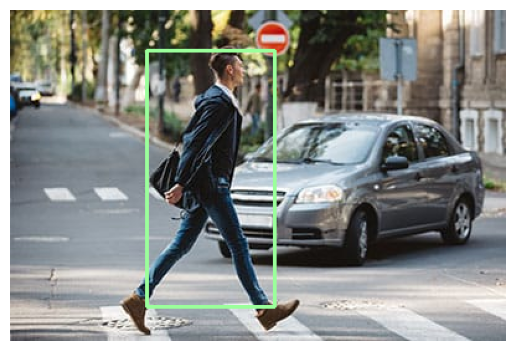

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to detect pedestrians in an image
def detect_pedestrians(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect pedestrians in the image
    pedestrians, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # Draw rectangles around the detected pedestrians
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (155, 255, 155), 2)

    # Display the image with detected pedestrians
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/ImageClass/MyDrive/MicrosoftTeams-image (53).png'
detect_pedestrians(image_path)




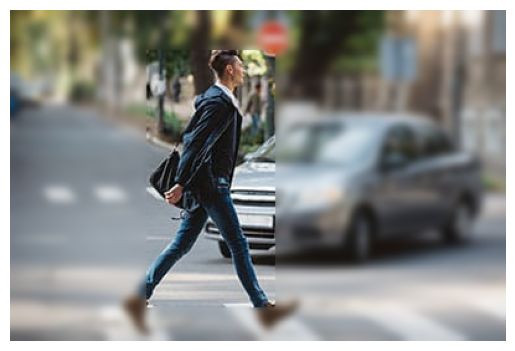

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to detect pedestrians and blur the background around them
def detect_and_blur_pedestrians(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect pedestrians in the image
    pedestrians, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # Create a mask for the pedestrians
    mask = np.zeros_like(image)
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255, 255, 255), thickness=cv2.FILLED)

    # Blur the entire image
    blurred_image = cv2.GaussianBlur(image, (21, 21), 0)

    # Apply the mask to blur the background around pedestrians
    result = np.where(mask != 0, image, blurred_image)

    # Display the image with blurred background around pedestrians
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/ImageClass/MyDrive/MicrosoftTeams-image (53).png'
detect_and_blur_pedestrians(image_path)

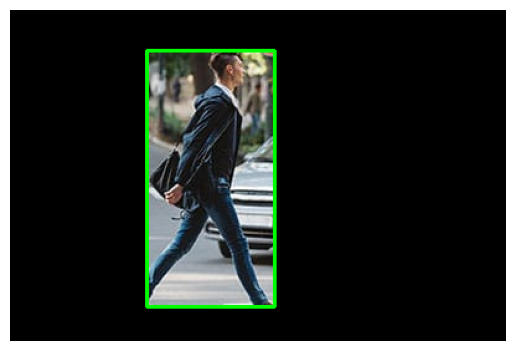

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to detect pedestrians, black out the background, and draw rectangles around pedestrians
def detect_and_blackout_pedestrians(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect pedestrians in the image
    pedestrians, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # Create a mask for the pedestrians
    mask = np.zeros_like(image)
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255, 255, 255), thickness=cv2.FILLED)

    # Black out the background
    result = np.where(mask != 0, image, 0)

    # Draw rectangles around detected pedestrians
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the image with blacked-out background and rectangles around pedestrians
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/ImageClass/MyDrive/MicrosoftTeams-image (53).png'
detect_and_blackout_pedestrians(image_path)

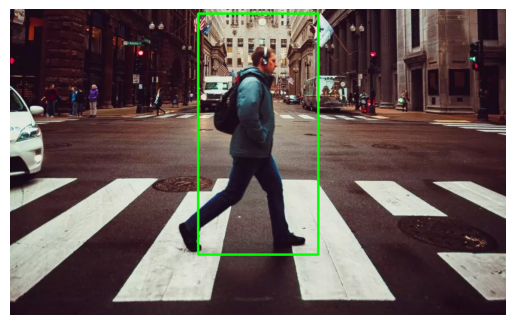

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to detect pedestrians in an image
def detect_pedestrians(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect pedestrians in the image
    pedestrians, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.09)

    # Draw rectangles around the detected pedestrians
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Display the image with detected pedestrians
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/ImageClass/MyDrive/person-walking-on-pedestrian-lane-1769387-min-1024x631-1.webp'
detect_pedestrians(image_path)


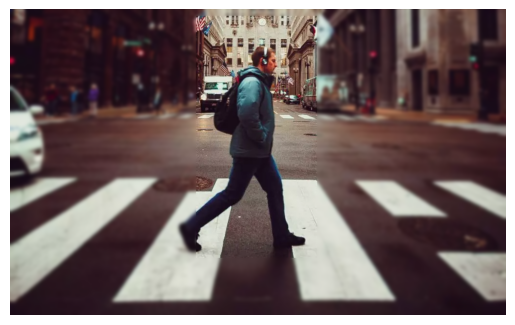

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to detect pedestrians and blur the background around them
def detect_and_blur_pedestrians(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect pedestrians in the image
    pedestrians, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # Create a mask for the pedestrians
    mask = np.zeros_like(image)
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255, 255, 255), thickness=cv2.FILLED)

    # Blur the entire image
    blurred_image = cv2.GaussianBlur(image, (21, 21), 0)

    # Apply the mask to blur the background around pedestrians
    result = np.where(mask != 0, image, blurred_image)

    # Display the image with blurred background around pedestrians
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/ImageClass/MyDrive/person-walking-on-pedestrian-lane-1769387-min-1024x631-1.webp'
detect_and_blur_pedestrians(image_path)


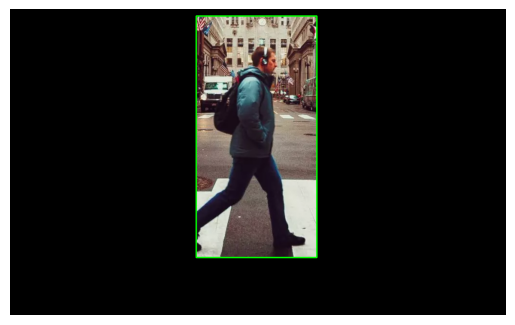

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to detect pedestrians, black out the background, and draw rectangles around pedestrians
def detect_and_blackout_pedestrians(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect pedestrians in the image
    pedestrians, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # Create a mask for the pedestrians
    mask = np.zeros_like(image)
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255, 255, 255), thickness=cv2.FILLED)

    # Black out the background
    result = np.where(mask != 0, image, 0)

    # Draw rectangles around detected pedestrians
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the image with blacked-out background and rectangles around pedestrians
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/ImageClass/MyDrive/person-walking-on-pedestrian-lane-1769387-min-1024x631-1.webp'
detect_and_blackout_pedestrians(image_path)


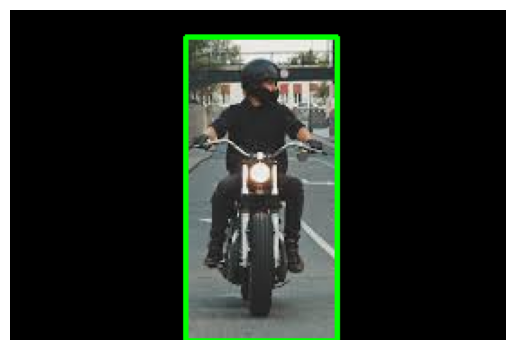

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to detect pedestrians, black out the background, and draw rectangles around pedestrians
def detect_and_blackout_pedestrians(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect pedestrians in the image
    pedestrians, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # Create a mask for the pedestrians
    mask = np.zeros_like(image)
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (255, 255, 255), thickness=cv2.FILLED)

    # Black out the background
    result = np.where(mask != 0, image, 0)

    # Draw rectangles around detected pedestrians
    for (x, y, w, h) in pedestrians:
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the image with blacked-out background and rectangles around pedestrians
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/ImageClass/MyDrive/bikerdude.jpg'
detect_and_blackout_pedestrians(image_path)


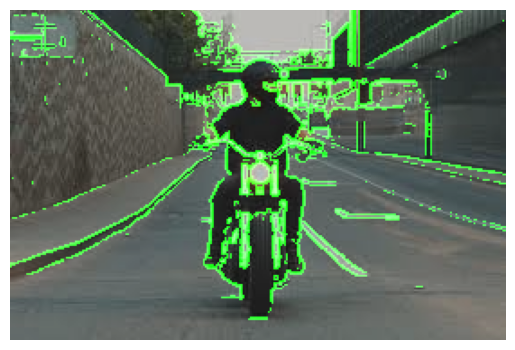

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

def detect_lanes_sobel(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for yellow and white lanes
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    lower_white = np.array([0, 0, 200])
    upper_white = np.array([255, 30, 255])
    white_mask = cv2.inRange(hsv, lower_white, upper_white)

    # Combine the masks
    combined_mask = cv2.bitwise_or(yellow_mask, white_mask)

    # Apply Gaussian blur to the combined mask
    blur = cv2.GaussianBlur(combined_mask, (5, 5), 0)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter in both x and y directions
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the magnitude of the gradients
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Scale the magnitude to 8-bit for visualization
    scaled_magnitude = np.uint8(255 * magnitude / np.max(magnitude))

    # Threshold the result
    _, binary_output = cv2.threshold(scaled_magnitude, 50, 255, cv2.THRESH_BINARY)

    # Create a blank image
    line_image = np.zeros_like(image)

    # Draw the lane on the image
    line_image[:, :, 1] = binary_output
    result = cv2.addWeighted(image, 0.8, line_image, 1, 0)

    return result

# Example usage
image_path = '/content/ImageClass/MyDrive/bikerdude.jpg'
image = cv2.imread(image_path)

# Detect lanes using Sobel filter
result_image_sobel = detect_lanes_sobel(image)

# Display the result
plt.imshow(cv2.cvtColor(result_image_sobel, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


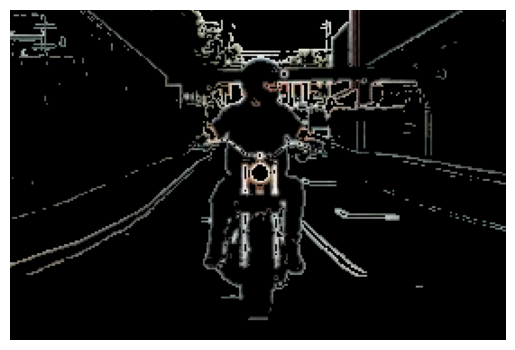

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

def detect_lanes_sobel(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for yellow and white lanes
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    lower_white = np.array([0, 0, 200])
    upper_white = np.array([255, 30, 255])
    white_mask = cv2.inRange(hsv, lower_white, upper_white)

    # Combine the masks
    combined_mask = cv2.bitwise_or(yellow_mask, white_mask)

    # Apply Gaussian blur to the combined mask
    blur = cv2.GaussianBlur(combined_mask, (5, 5), 0)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter in both x and y directions
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the magnitude of the gradients
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Scale the magnitude to 8-bit for visualization
    scaled_magnitude = np.uint8(255 * magnitude / np.max(magnitude))

    # Threshold the result
    _, binary_output = cv2.threshold(scaled_magnitude, 50, 255, cv2.THRESH_BINARY)

    # Create a blank image
    line_image = np.zeros_like(image)

    # Draw the lane on the image
    line_image[:, :, 1] = binary_output

    # Create a mask based on the detected lanes
    mask = np.zeros_like(binary_output)
    mask[(binary_output > 0)] = 255

    # Blacken out the areas outside the detected lanes
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# Example usage
image_path = '/content/ImageClass/MyDrive/bikerdude.jpg'
image = cv2.imread(image_path)

# Detect lanes using Sobel filter
result_image_sobel = detect_lanes_sobel(image)

# Display the result
plt.imshow(cv2.cvtColor(result_image_sobel, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
